In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
print (sorted(os.listdir('gdrive/My Drive/Colab Notebooks')))
os.chdir('gdrive/My Drive/Colab Notebooks')


Mounted at /content/gdrive
['603 Assignment3 Practice.ipynb', 'Copy of DS Assignment 4 (1).ipynb', 'Copy of DS Assignment 4.ipynb', 'Copy of HW 3 - Swathi - 120428326.ipynb', 'DS Assignment 3_Swathi (1).ipynb', 'DS Assignment 3_Swathi.ipynb', 'DS Assignment 4.ipynb', 'DS-Assignment2-SwathiBaskaran.ipynb', 'DS-Midterm.ipynb', 'Decision Tree - Swathi - 120428326.ipynb', 'HW 3 - Swathi - 120428326.ipynb', 'HW 4 - Swathi - 120428326.ipynb', 'HW 7-Swathi-120428326.ipynb', 'HW 8 - 120428326 - Swathi.ipynb', 'HW 8-practice.ipynb', 'HW 9-120428326-Swathi.ipynb', 'HW1 - Swathi - 120428326', 'HW10-Swathi-120428326 .ipynb', 'HW2 - Swathi - 120428326.ipynb', 'HW5-Swathi-120428326.ipynb', 'HW6-Swathi-120428326.ipynb', 'MBAProject.ipynb', 'Practice HW5.ipynb', 'Practice but correct.ipynb', 'Untitled0.ipynb', 'foods.txt']


In [ ]:
import pandas as pd
import re
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
with open('foods.txt',encoding = "ISO-8859-1") as f:
    contents = f.readlines()

for textline in (contents[:8]):
    print(textline, end ='')

product/productId: B001E4KFG0
review/userId: A3SGXH7AUHU8GW
review/profileName: delmartian
review/helpfulness: 1/1
review/score: 5.0
review/time: 1303862400
review/summary: Good Quality Dog Food
review/text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


#I connected to my gdrive and pulled the txt file and read the file line by line.Then printed only one set of data that is first 8 lines.

In [ ]:
# Initialize lists
product_ids = []
user_ids = []
profile_names = []
helpfulness = []
scores = []
times = []
summaries = []
texts = []

# Read all data and put them in table
for line in contents:
    parts = line.split(': ')
    if len(parts) >= 2:
        key, value = parts[0].strip(), parts[1].strip()

        if key == 'product/productId':
            product_ids.append(value)
        elif key == 'review/userId':
            user_ids.append(value)
        elif key == 'review/profileName':
            profile_names.append(value)
        elif key == 'review/helpfulness':
            helpfulness.append(value)
        elif key == 'review/score':
            scores.append(value)
        elif key == 'review/time':
            times.append(value)
        elif key == 'review/summary':
            summaries.append(value)
        elif key == 'review/text':
            texts.append(value)

# Create a DataFrame
df = pd.DataFrame({
    'product/productId': product_ids,
    'review/userId': user_ids,
    'review/profileName': profile_names,
    'review/helpfulness': helpfulness,
    'review/score': scores,
    'review/time': times,
    'review/summary': summaries,
    'review/text': texts
})

df

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0/0,5.0,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0/0,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1/1,5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


#I created a list for each column and put all the data in table to the respective columns. Then I created a dataframe for it.

In [ ]:
# Dropping Null values
df.dropna(inplace=True)
df

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0/0,5.0,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0/0,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1/1,5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


I first dropped all the rows that had Null values.



In [ ]:
print(df.isnull().sum())

product/productId     0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64


In [ ]:
# Removing duplicates
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0/0,5.0,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0/0,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1/1,5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


#Now, I also dropped all the duplicate rows.

In [ ]:
# Split 'review/helpfulness' into two columns as Numerator and Denominator
df[['review/helpfulnessNumerator', 'review/helpfulnessDenominator']] = df['review/helpfulness'].str.split('/', expand=True).astype(int)
df = df.drop('review/helpfulness', axis=1)
df

,product/productId,review/userId,review/profileName,review/score,review/time,review/summary,review/text,review/helpfulnessNumerator,review/helpfulnessDenominator
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,3,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0,0
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,5.0,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0,0
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0,0
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2,2
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1,1


#I just separated the fraction from the helpfulness column into numerator and denominator, so that I can compare both the columns and eliminate the rows that does not makes sense based on the comaprison. I wanted to reduce the size of the dataset a little bit for a better computation

In [ ]:
# Compare and drop rows where helpfulnessDenominator < helpfulnessNumerator
df = df[df['review/helpfulnessDenominator'] >= df['review/helpfulnessNumerator']]
df

,product/productId,review/userId,review/profileName,review/score,review/time,review/summary,review/text,review/helpfulnessNumerator,review/helpfulnessDenominator
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,3,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0,0
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,5.0,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0,0
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0,0
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2,2
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1,1


I removed the columns where the denominator is less than the numerator, which doesn't make sense.

In [ ]:
# Function to clean text - changed to lower case, removed punctuation, symbols, stop words, did lemmatization
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

df['review/summary'] = df['review/summary'].apply(clean_text)
df['review/text'] = df['review/text'].apply(clean_text)
df

<ipython-input-10-a5e3e521c919>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review/summary'] = df['review/summary'].apply(clean_text)
<ipython-input-10-a5e3e521c919>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review/text'] = df['review/text'].apply(clean_text)


,product/productId,review/userId,review/profileName,review/score,review/time,review/summary,review/text,review/helpfulnessNumerator,review/helpfulnessDenominator
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5.0,1303862400,good quality dog food,bought several vitality canned dog food produc...,1,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1.0,1346976000,advertised,product arrived labeled jumbo salted peanutsth...,0,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4.0,1219017600,delight say,confection around century light pillowy citrus...,1,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2.0,1307923200,cough medicine,looking secret ingredient robitussin believe f...,3,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5.0,1350777600,great taffy,great taffy great price wide assortment yummy ...,0,0
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,5.0,1299628800,without,great sesame chickenthis good better resturant...,0,0
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,2.0,1331251200,disappointed,im disappointed flavor chocolate note especial...,0,0
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",5.0,1329782400,perfect maltipoo,star small give 1015 one training session trie...,2,2
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",5.0,1331596800,favorite training reward treat,best treat training rewarding dog good groomin...,1,1


#I wanted to clean the text, so created a function in which I - changed the text to lower case, removed all the punctuations, removed all symbols, then removed all stop words, and did word lemmetization to get a better data for training the model. I did the cleaning for both the summary and text columns.

<ipython-input-12-f8508b02f344>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['review/text'].apply(remove_html_tags)


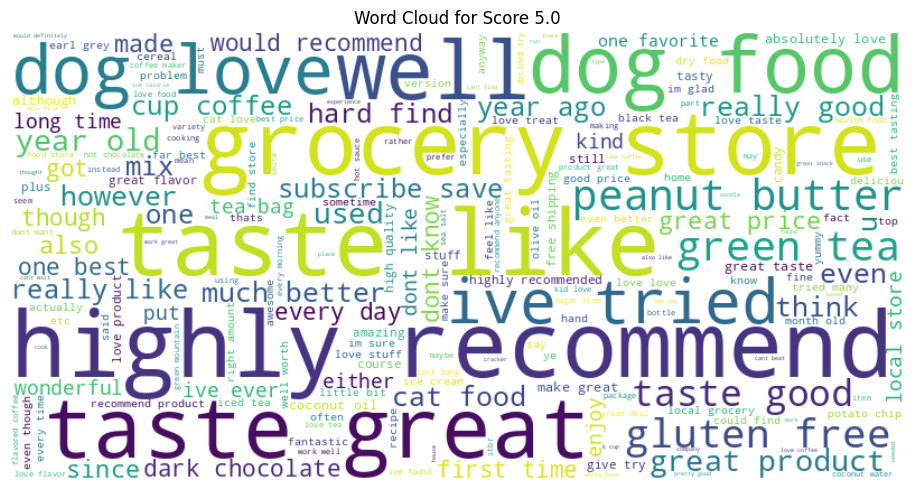

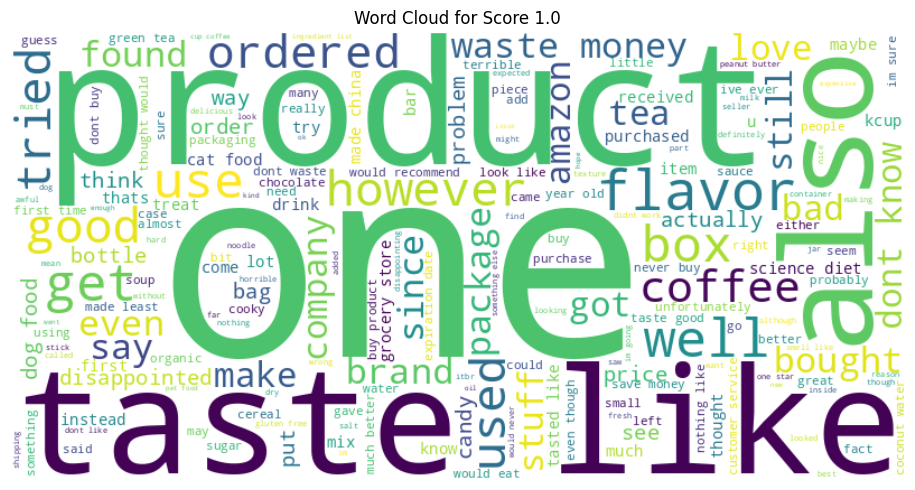

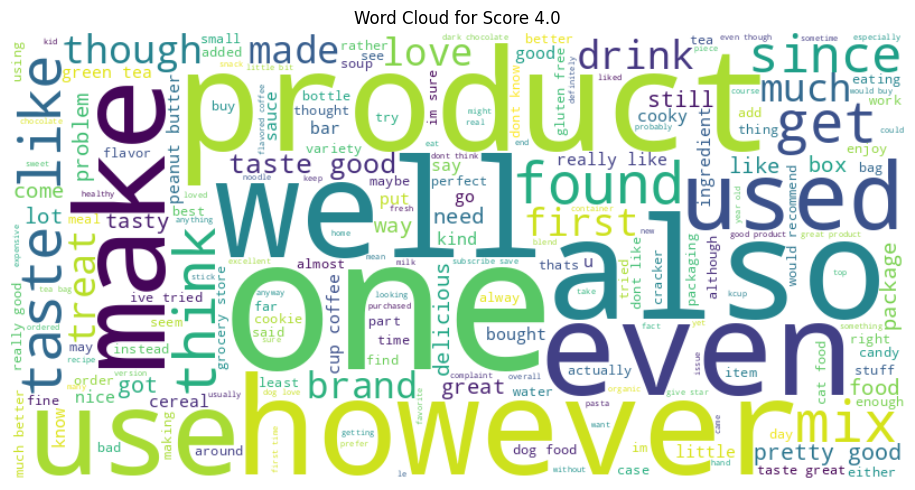

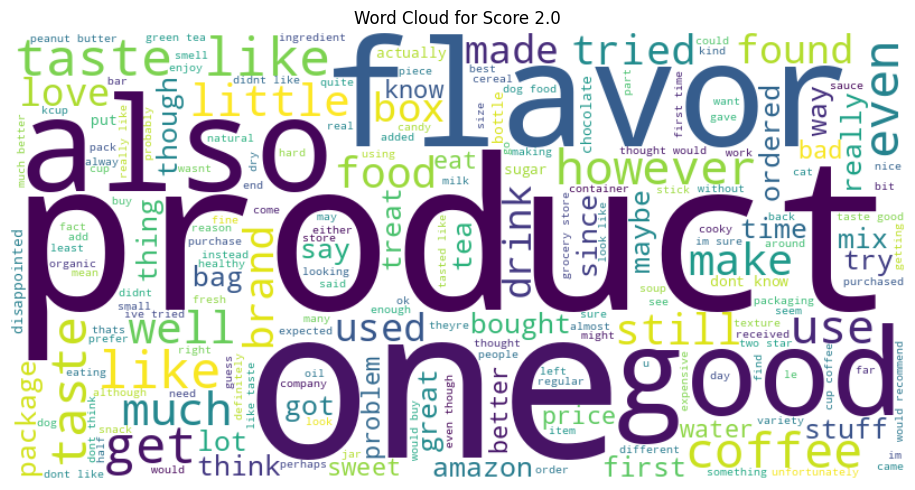

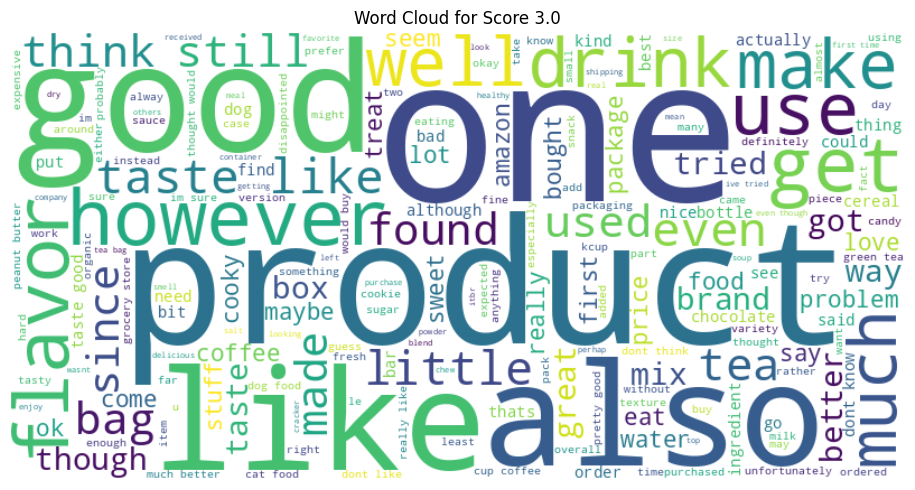

In [ ]:
# Removing HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    for tag in ['br', 'a']:
        for match in soup.find_all(tag):
            match.replace_with('')
    return ' '.join(soup.stripped_strings)

df['cleaned_text'] = df['review/text'].apply(remove_html_tags)

score_wordclouds = {}
for score in df['review/score'].unique():
    text_for_score = ' '.join(df[df['review/score'] == score]['cleaned_text'])
    score_wordclouds[score] = text_for_score

# Create word clouds
for score, text_for_score in score_wordclouds.items():
    stopwords_list = set(stopwords.words('english'))
    stopwords_list.update(['br', 'href'])
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords_list
    ).generate(text_for_score)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Score {score}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

#I also removed the HTML tags like 'br' and 'a', etc.
#I created a word cloud for each score and wanted to see what kind of words are there for score 5 and score 1, was able to see a little difference in words. In score 5, saw words like good, like, great, whereas in score 1, I could see words like bad, didnt, not, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568452 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   product/productId              568452 non-null  object
 1   review/userId                  568452 non-null  object
 2   review/profileName             568452 non-null  object
 3   review/score                   568452 non-null  object
 4   review/time                    568452 non-null  object
 5   review/summary                 568452 non-null  object
 6   review/text                    568452 non-null  object
 7   review/helpfulnessNumerator    568452 non-null  int64 
 8   review/helpfulnessDenominator  568452 non-null  int64 
 9   cleaned_text                   568452 non-null  object
dtypes: int64(2), object(8)
memory usage: 47.7+ MB


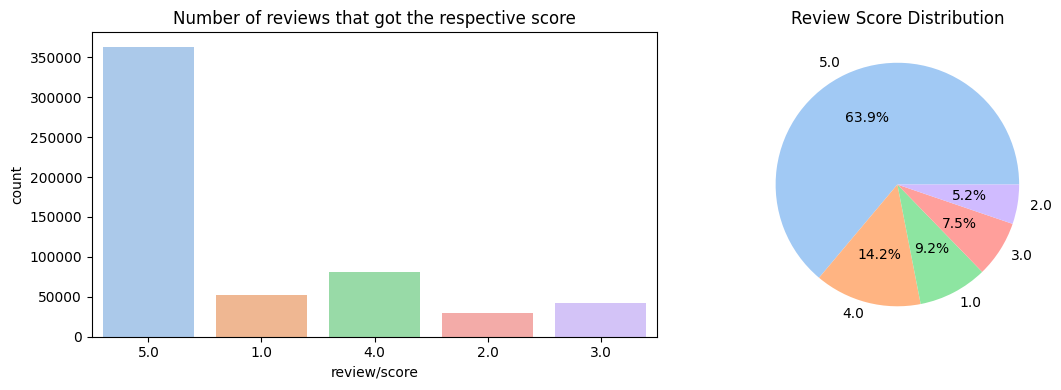

In [ ]:
# Bar graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=df['review/score'], palette='pastel')
plt.title('Number of reviews that got the respective score')

# Pie chart
plt.subplot(1, 2, 2)
score_distribution = df['review/score'].value_counts()
plt.pie(score_distribution, labels=score_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Review Score Distribution')

plt.tight_layout()
plt.show()

#I wanted to see how the each scores are being distibuted. From this we can see that score 5 is present the most and the others all less. The shows the imbalance in distribution.

<ipython-input-15-e8da09695fde>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['review/text'].apply(len), bins=100, palette='pastel')


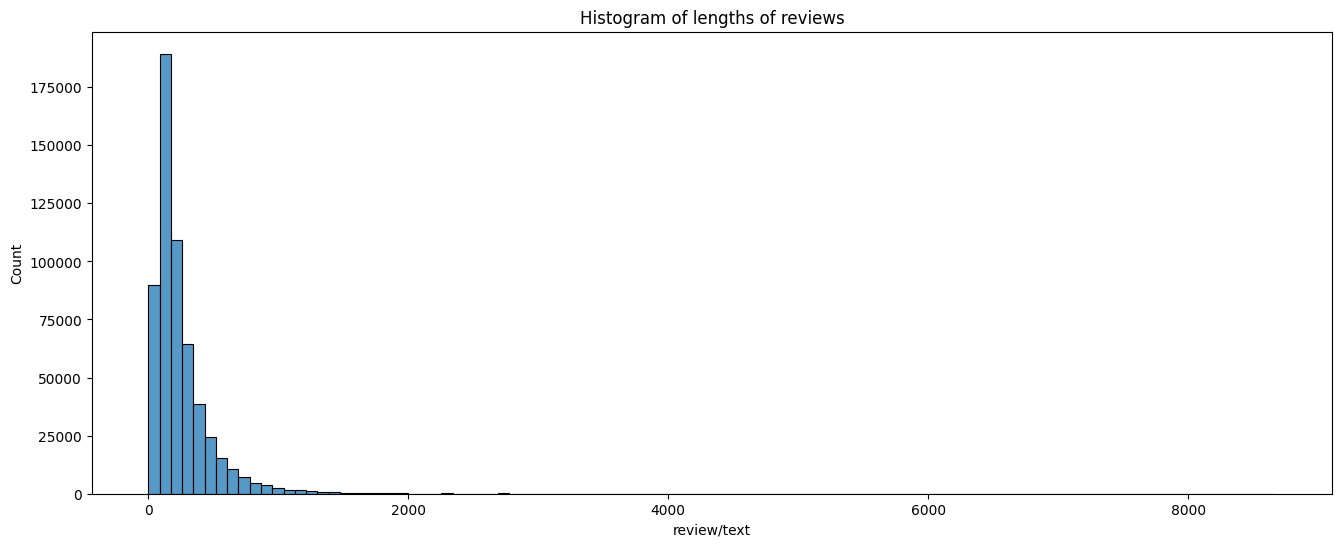

In [ ]:
# Histogram for text
plt.figure(figsize=(16,6))
sns.histplot(df['review/text'].apply(len), bins=100, palette='pastel')
plt.title('Histogram of lengths of reviews')
plt.show()

#I plotted a histogram for the count of words in review/text column. It is clear that there are few reviews that are very long, i assume that there will be a lot of unwanted data in it. So, to reduce the dataset a little bit, I dropped the rows with review/text which has word count >1000. I plotted a new histogram for that.

<ipython-input-16-a6760305d9cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_word_count'] = df['review/text'].apply(lambda x: len(x.split()))
<ipython-input-16-a6760305d9cc>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['text_word_count'], bins=100, palette='pastel')


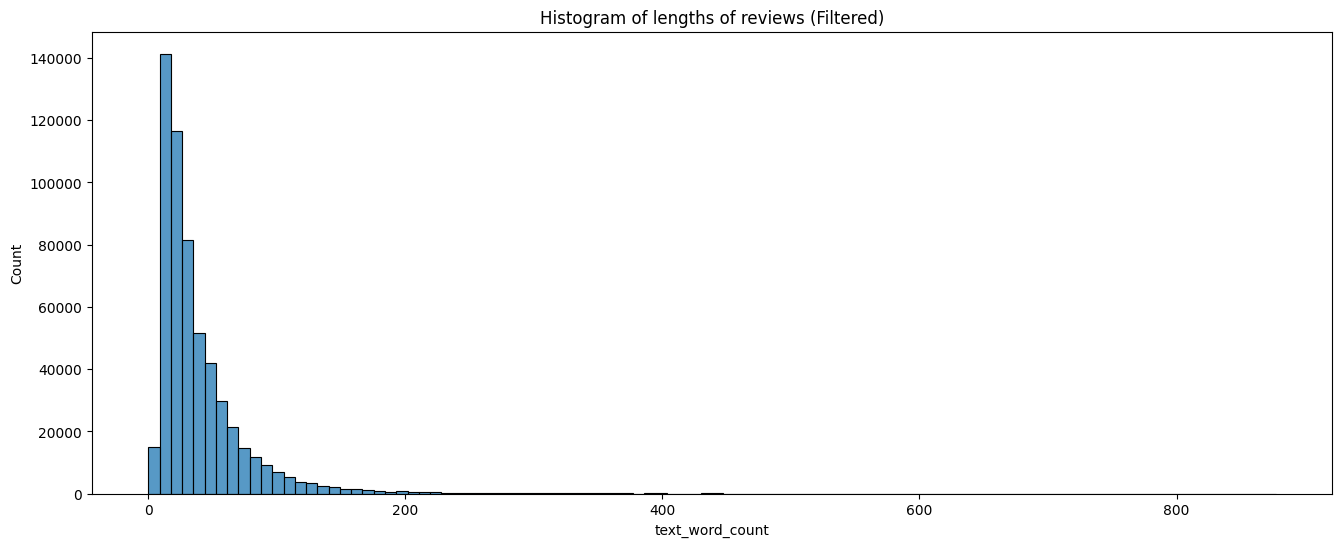

<ipython-input-16-a6760305d9cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review length'] = df['review/text'].apply(len)
<ipython-input-16-a6760305d9cc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summary length'] = df['review/summary'].apply(len)
<ipython-input-16-a6760305d9cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
df['text_word_count'] = df['review/text'].apply(lambda x: len(x.split()))

df = df[df['text_word_count'] <= 1000]

plt.figure(figsize=(16, 6))
sns.histplot(df['text_word_count'], bins=100, palette='pastel')
plt.title('Histogram of lengths of reviews (Filtered)')
plt.show()

df['review length'] = df['review/text'].apply(len)
df['summary length'] = df['review/summary'].apply(len)
length = df[df['review length'] > 2000].index.tolist()
df.drop(length, inplace=True)

<ipython-input-17-19745b31ca5d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['review/summary'].apply(len), bins=100, palette='pastel')


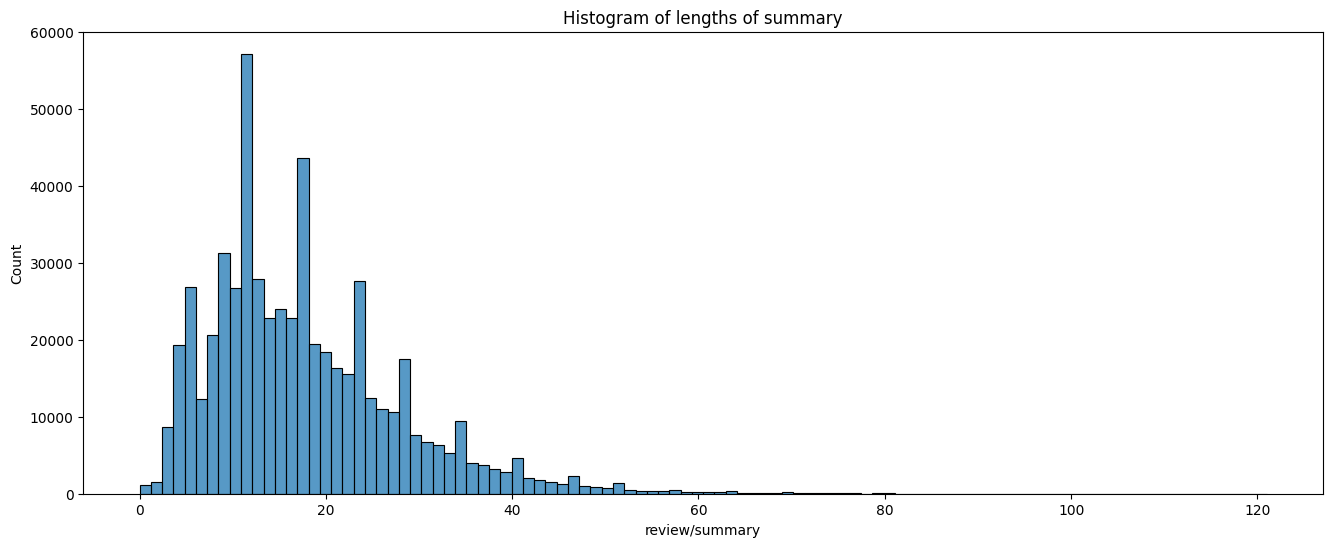

In [ ]:
#Histogram fro summary
plt.figure(figsize=(16,6))
sns.histplot(df['review/summary'].apply(len), bins=100, palette='pastel')
plt.title('Histogram of lengths of summary')
plt.show()

#I also checked the word count for the review/summary column. This is pretty descent sumamry can be of 120 words. So, I didn't drop any rows here.

<ipython-input-18-371a962edca5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review/time'] = pd.to_datetime(df['review/time'], unit='s')
<ipython-input-18-371a962edca5>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['review/time'],bins=100, palette='pastel')


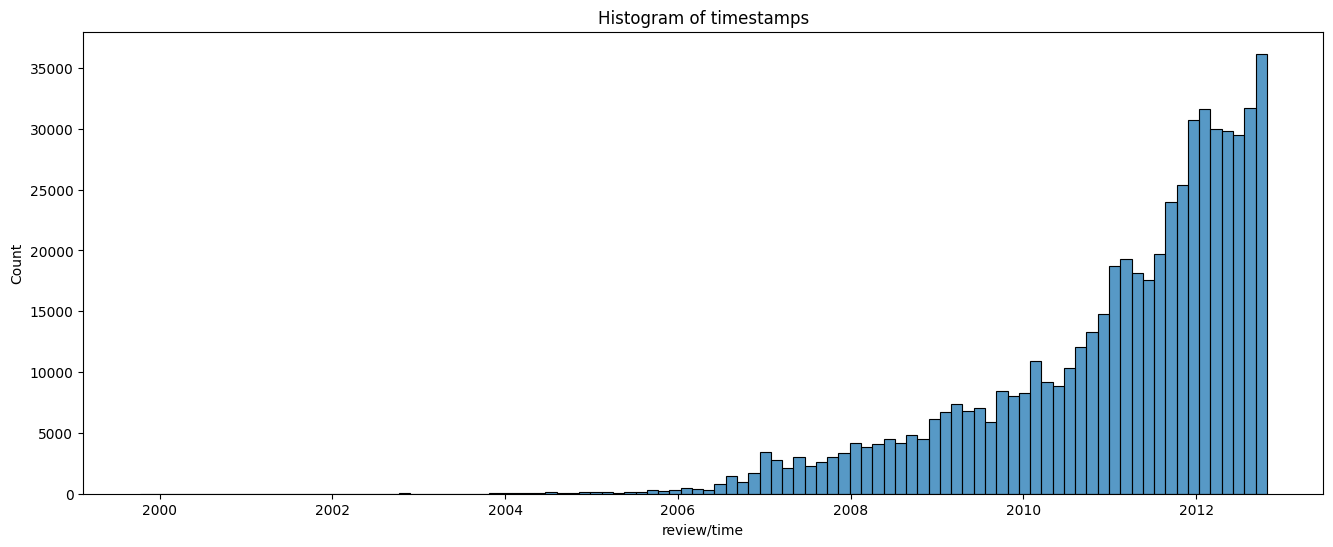

In [ ]:
# Histogram for time
df['review/time'] = pd.to_datetime(df['review/time'], unit='s')
plt.figure(figsize=(16,6))
sns.histplot(df['review/time'],bins=100, palette='pastel')
plt.title('Histogram of timestamps')
plt.show()

#I plotted a histogram to see when the reviews were made. I is clear that we got proper reviews from 2006 and started increasing gradually as years passed. I would infer that people started putting in review in the later years comparitively.

In [ ]:
df['review/score'].value_counts()

5.0    362558
4.0     80519
1.0     51994
3.0     42591
2.0     29736
Name: review/score, dtype: int64

In [ ]:
# Dropping unwanted columns
df.drop(['product/productId', 'review/profileName', 'review/helpfulnessNumerator','review/helpfulnessDenominator','text_word_count','review length','summary length'], axis=1, inplace=True)
df

<ipython-input-23-4f0802f5b551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['text_word_count','review length','summary length'], axis=1, inplace=True)


,review/userId,review/score,review/time,review/summary,review/text,cleaned_text
0,A3SGXH7AUHU8GW,5.0,2011-04-27,good quality dog food,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
1,A1D87F6ZCVE5NK,1.0,2012-09-07,advertised,product arrived labeled jumbo salted peanutsth...,product arrived labeled jumbo salted peanutsth...
2,ABXLMWJIXXAIN,4.0,2008-08-18,delight say,confection around century light pillowy citrus...,confection around century light pillowy citrus...
3,A395BORC6FGVXV,2.0,2011-06-13,cough medicine,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...
4,A1UQRSCLF8GW1T,5.0,2012-10-21,great taffy,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...
568449,A28KG5XORO54AY,5.0,2011-03-09,without,great sesame chickenthis good better resturant...,great sesame chickenthis good better resturant...
568450,A3I8AFVPEE8KI5,2.0,2012-03-09,disappointed,im disappointed flavor chocolate note especial...,im disappointed flavor chocolate note especial...
568451,A121AA1GQV751Z,5.0,2012-02-21,perfect maltipoo,star small give 1015 one training session trie...,star small give 1015 one training session trie...
568452,A3IBEVCTXKNOH,5.0,2012-03-13,favorite training reward treat,best treat training rewarding dog good groomin...,best treat training rewarding dog good groomin...


#I thought these columns were not that useful so I decided to drop them for better computation.

In [28]:
# Building a Naive Bayes model
df=df.sample(60000)
X = df[['review/summary', 'review/text']]
y = df['review/score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Text feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['review/summary'] + ' ' + X_train['review/text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['review/summary'] + ' ' + X_test['review/text'])

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

y_pred_naive_bayes = naive_bayes_model.predict(X_test_tfidf)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_naive_bayes_percentage = accuracy_naive_bayes * 100

print(f'Naive Bayes Accuracy: {accuracy_naive_bayes_percentage:.2f}%')
print(classification_report(y_test, y_pred_naive_bayes))

Naive Bayes Accuracy: 64.03%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       1.00      0.01      0.01      1079
         2.0       0.00      0.00      0.00       627
         3.0       0.00      0.00      0.00       909
         4.0       0.00      0.00      0.00      1710
         5.0       0.64      1.00      0.78      7675

    accuracy                           0.64     12000
   macro avg       0.33      0.20      0.16     12000
weighted avg       0.50      0.64      0.50     12000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Naive Bayes model gave out accuracy to 64.7% ,  I would say is not bad model. It might always predict score 5.

In [29]:
# Build a Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)

y_pred_logistic_regression = logistic_regression_model.predict(X_test_tfidf)

accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_logistic_regression_percentage = accuracy_logistic_regression * 100

print(f'Logistic Regression Accuracy: {accuracy_logistic_regression_percentage:.2f}%')
print(classification_report(y_test, y_pred_logistic_regression))

Logistic Regression Accuracy: 72.45%
              precision    recall  f1-score   support

         1.0       0.65      0.59      0.62      1079
         2.0       0.43      0.14      0.21       627
         3.0       0.46      0.23      0.31       909
         4.0       0.48      0.22      0.30      1710
         5.0       0.77      0.96      0.86      7675

    accuracy                           0.72     12000
   macro avg       0.56      0.43      0.46     12000
weighted avg       0.68      0.72      0.68     12000



#Logistic regression model gave out 72.4% accuracy, which is better than the Naive Bayes model. This model has pretty good prediction for all the scores. For all the data I ran the model to get a accuracy of about 76.7%

In [30]:
# Build Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(X_train_tfidf, y_train)

y_pred_random_forest = random_forest_model.predict(X_test_tfidf)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_random_forest_percentage = accuracy_random_forest * 100

print(f'Random Forest Accuracy: {accuracy_random_forest_percentage:.2f}%')
print(classification_report(y_test, y_pred_random_forest))

Random Forest Accuracy: 70.84%
              precision    recall  f1-score   support

         1.0       0.85      0.36      0.50      1079
         2.0       1.00      0.15      0.26       627
         3.0       0.89      0.15      0.26       909
         4.0       0.93      0.13      0.22      1710
         5.0       0.69      1.00      0.82      7675

    accuracy                           0.71     12000
   macro avg       0.87      0.36      0.41     12000
weighted avg       0.77      0.71      0.63     12000



#Random Forest model has accuracy of about 70.84% , which is the best model so far. The model also predicts all the scores pretty well. I also understood that the Random forest classifier takes a very long time to run, comparitively.


#I was also run the model for all the data without sampling the data, and was able to get accuracy about 81%.

In [31]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred_decision_tree = decision_tree_model.predict(X_test_tfidf)

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_decision_tree_percentage = accuracy_decision_tree * 100

print(f'Decision Tree Accuracy: {accuracy_decision_tree_percentage:.2f}%')

# Display classification report for Decision Tree
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Accuracy: 64.78%
              precision    recall  f1-score   support

         1.0       0.47      0.48      0.48      1079
         2.0       0.26      0.22      0.24       627
         3.0       0.31      0.26      0.28       909
         4.0       0.35      0.31      0.33      1710
         5.0       0.78      0.83      0.81      7675

    accuracy                           0.65     12000
   macro avg       0.44      0.42      0.43     12000
weighted avg       0.63      0.65      0.64     12000



#I also tried out the decision tree model and it gave a 64.7 accuracy.



#Hence I will choose the logistic regression and random forest model as the best model for this.



